### Подключаем пакет

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

## Кейс "чаевые"
### Загрузка данных и их первичная проверка

In [2]:
# Загрузим данные
tips = sns.load_dataset("tips")
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [3]:
# Статистика по численным столбцам
# ваш код
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [4]:
# Посчитаем число строк
# ваш код
tips.count()

total_bill    244
tip           244
sex           244
smoker        244
day           244
time          244
size          244
dtype: int64

In [5]:
# Проверим на наличие NaN в столбцах
# Кстати а зачем это делать?
# ваш код
tips.isna().sum(axis = 0)

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

## Простая визуализация

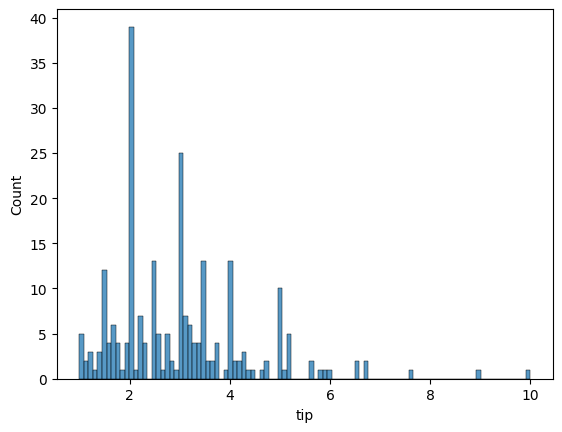

In [6]:
# посмотрим на данные
# bins= 5, 10, 20,30
# почему такая разича в картинках, почему пила, какова причина?

sns.histplot(tips['tip'], kde=False, bins=100);

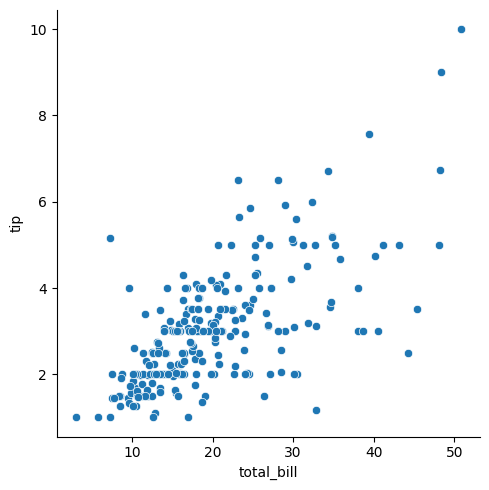

In [7]:
sns.relplot(x="total_bill", y="tip", data=tips);

## Кто больше? Курящие или некурящие?

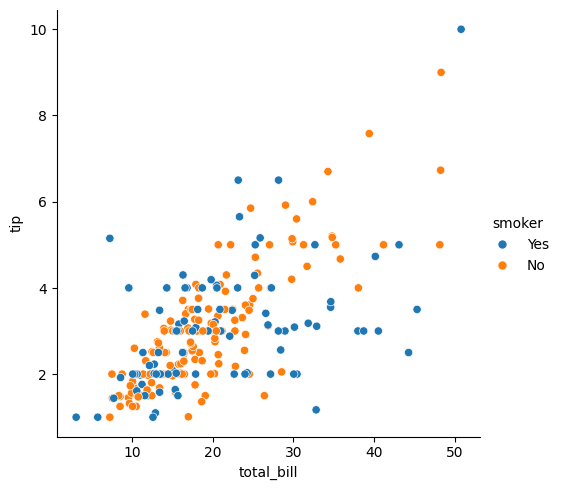

In [8]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

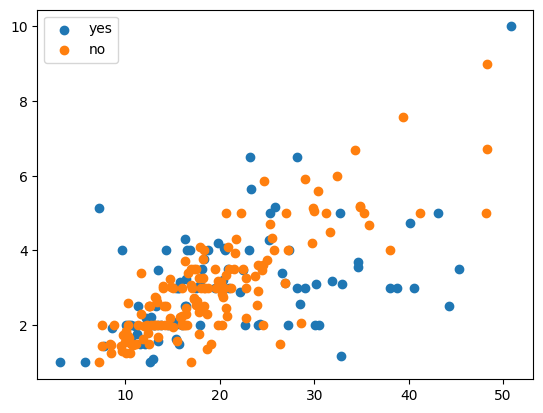

In [9]:
# создать smoker_yes для курящих
# ваш код
smoker_yes = tips[tips.smoker == 'Yes']

# создать smoker_no для некурящих
# ваш код
smoker_no = tips[tips.smoker == 'No']

# создать похожее в matplotlib
# ваш код
#fig, ax = plt.subplot()
plt.scatter(x = smoker_yes['total_bill'], y = smoker_yes['tip'], label = 'yes')
plt.scatter(x = smoker_no['total_bill'], y = smoker_no['tip'], label = 'no')
plt.legend();

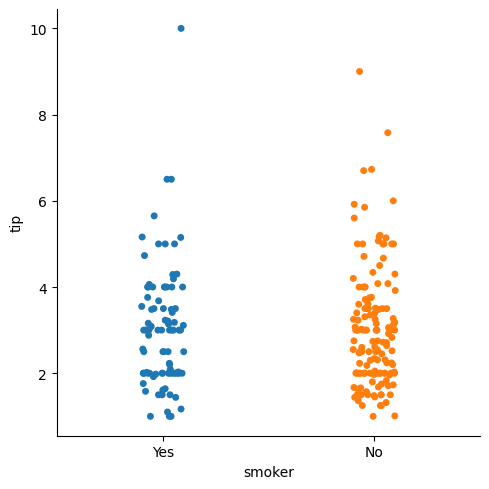

In [10]:
# а так уже проще только в sns
sns.catplot(x="smoker", y="tip", order=["Yes", "No"], data=tips,  hue="smoker");

## Заглянем глубже
### Посмотрим проценты чаевых от счета

In [11]:
# создадим столбец tip_pct впишем код и посмотрим на 5 первых строк
# ваш код
tips['tip_pct'] = tips['tip']/tips['total_bill']*100
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


### Золотое время и в каком зале лучше?

In [12]:
# агрегируем по дням недели и курящим среднею доходность чаевых
# ваш код
tips.groupby(['day','smoker']).tip_pct.mean()

day   smoker
Thur  Yes       16.386327
      No        16.029808
Fri   Yes       17.478305
      No        15.165044
Sat   Yes       14.790607
      No        15.804766
Sun   Yes       18.725032
      No        16.011294
Name: tip_pct, dtype: float64

In [13]:
# агрегируем по дням недели и курящим средний процент чаевых с разбросом
# ваш код
tips.groupby(['day','smoker']).tip_pct.agg([('mean', 'mean'),('стд.',np.std)])

mean       стд.
day  smoker                      
Thur Yes     16.386327   3.938881
     No      16.029808   3.877420
Fri  Yes     17.478305   5.129267
     No      15.165044   2.812295
Sat  Yes     14.790607   6.137495
     No      15.804766   3.976730
Sun  Yes     18.725032  15.413424
     No      16.011294   4.234723

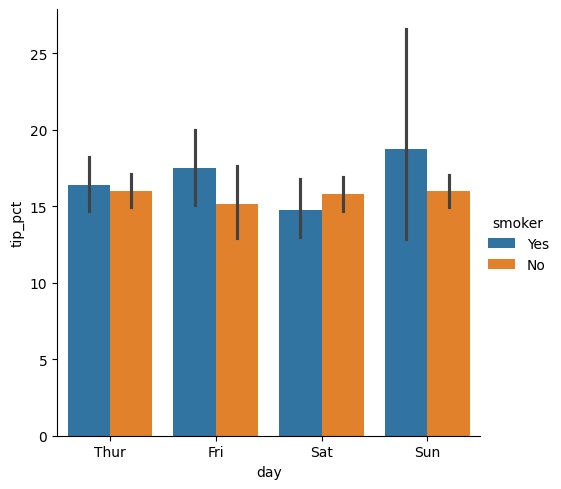

In [14]:
sns.catplot(x="day", y="tip_pct", hue="smoker", data=tips, kind="bar");

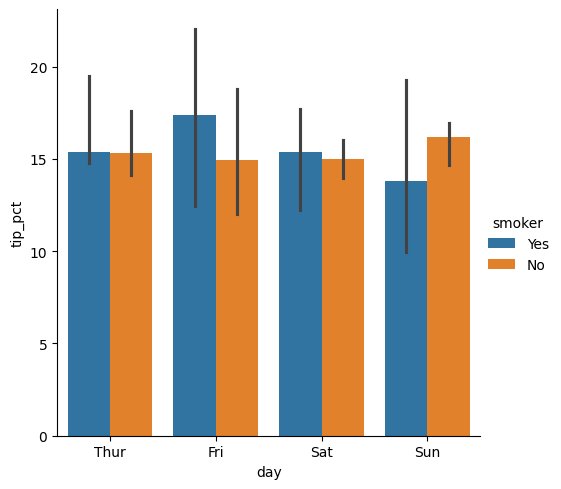

In [15]:
# стоп, а если разброс нужен не относительно mean а median?
# ваш код
sns.catplot(x="day", y="tip_pct", hue="smoker", data=tips, kind="bar", estimator = np.median);

In [16]:
# агрегируем по значениям и отберем значение счета + проценты 
# ваш код

In [17]:
# Сколько было обслужено, и какие чаевые были максимальны?
# ваш код

In [18]:
# статистика по прочентам чаевых (min,max,mean,std) и количество обслуженных
# ваш код

### Рыба моей мечты (лучший клиент)

In [19]:
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426


In [20]:
# проиндексируем средние по дням и курильшикам данные
# Внимание! по умолчанию теперь в pandas 2.0 стоит numeric_only=False 
#           и не работатет на категориальных переменных
tips.groupby(['day','smoker'], as_index=False).mean(numeric_only=True)

,day,smoker,total_bill,tip,size,tip_pct
0,Thur,Yes,19.190588,3.030000,2.352941,16.386327
1,Thur,No,17.113111,2.673778,2.488889,16.029808
2,Fri,Yes,16.813333,2.714000,2.066667,17.478305
3,Fri,No,18.420000,2.812500,2.250000,15.165044
4,Sat,Yes,21.276667,2.875476,2.476190,14.790607
5,Sat,No,19.661778,3.102889,2.555556,15.804766
6,Sun,Yes,24.120000,3.516842,2.578947,18.725032
7,Sun,No,20.506667,3.167895,2.929825,16.011294


In [21]:
# найдем три наилучших счета
# ваш код

In [22]:
# улучшим вывод через lambda
# ваш код

In [23]:
# еще круче - через собственную функцию
# ваш код

In [24]:
# еще и еще круче - через собственную функцию с начтройками
# ваш код

In [25]:
# Найдем клиента дня по размеру чаевых
# ваш код

In [27]:
# Найдем клиента дня по проценту от счета


## Создадим СВОДНУЮ ТАБЛИЦУ (а как вы думаете в чем отличие?)

In [ ]:
tips.pivot_table(index=['smoker','day'])

In [ ]:
tips.pivot_table( ['tip_pct','size'],   index=['time','day'],   columns = 'smoker' )

In [ ]:
tips.pivot_table( 'tip_pct',   index=['time','smoker'],   columns = 'day' , aggfunc = len , margins = True )

## Кростабуляция (считаем количество)
Почему через кростабуляцию считать лучше?

In [ ]:
pd.crosstab([tips.time, tips.smoker], tips.day, margins = True)

In [ ]:
# Хитрый вопрос, а как убрать All снизу, а справа?
pd.crosstab([tips.time, tips.smoker], tips.day, margins = True).iloc[:-1]